Next, we incorporate the presence of dynamical friction into our system. The result of this is that the orbit will now naturally decay, so if we start at some place where our initial values for A=B=1. Even so, we still expect our orbit to eventually wind up having a pericentric distance of 1e-7, the point at which gravitational radiation takes over. 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

In [51]:
def f(r,t,AA=1,BB=1):
    
    """
    For some given function with an input r and timestep t, we output the derivative of every value,
    which is in turn used in the rk4 integration 
    """
    
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    
    Dx = vx
    Dy = vy
    
    R = np.sqrt(x**2 + y**2)
    

    V = np.sqrt(vx**2 + vy**2)
    Dvx = -G*M*x/R**3 - AA*vx / (V**3 + BB)
    
    Dvy = -G*M*y/R**3 - AA*vy / (V**3 + BB)
    
    
    
    
    return np.array([Dx,Dy,Dvx,Dvy])

def rk4(h,r,f):
    """
    RK4 Integration for some step size of h
    
    """
    
    k1 = h*f(r,t)
    k2 = h*f(r + 0.5*k1,t+0.5*h)
    k3 = h*f(r + 0.5*k2,t+0.5*h)
    k4 = h*f(r + k3,t+h)

    rout = r + (k1 + 2*k2 + 2*k3 + k4)/6 #update occurs here
    return rout

In [52]:
G = M  = 1
rapo = 1
a = (1 + 1e-7)/2


#vy = np.sqrt((G*M/4) *(2/rapo - 1/a))

#the new vy is the 80% of the circular orbit, which is .8*.5

vy = .8*.5

In [53]:
a = (1 + 1e-7)/2


T = np.sqrt(16*np.pi**2 * a**3)

In [58]:
h = 1e-4 # This is the initial stepping size. 

r0 = np.array([1.0,0.0,0.0,vy],float)

delta = 1e-6 # error tolerance 
r_sols = []
ts = []
t = 0 #initialize as 0 time 
int_time = 40 #ends after about 10 orbits. 
rcrit = 1e-7
#break if  below critical r

while t < int_time: 
    
    rtemp = rk4(h, r0, f)

    # Error at h and 2*h
    rError1 = rk4(h, rtemp, f)
    rError2 = rk4(2*h, r0, f)
    xerror = (rError1[0] - rError2[0])/30.  # 0th element -> x component
    yerror = (rError1[1] - rError2[1])/30.
    rho = h*delta/np.sqrt(xerror**2 + yerror**2)

    # If rho > 1, actual accuracy is better than the target accuracy. Keep it.
    if rho > 1:
        print("worked")
        t += h
        r0 = rtemp
        h = h*rho**(1/4) # Make it bigger since rho^1/4 > 1
        
        #save values and time step below
        r_sols.append(rtemp)
        ts.append(t)
        
        rtest = np.sqrt(rtemp[0]**2 + rtemp[1]**2)
        if rtest<= rcrit:
            break
        
    elif rho < 1:
        print('adapted')
        h = h * rho**(1/4)
    else:
        h = 1e-4
        
        
xs = [x[0] for x in r_sols]
vxs = [x[2] for x in r_sols]


ys = [y[1] for y in r_sols]
vys = [y[3] for y in r_sols]

rs = np.sqrt(np.power(xs,2) + np.power(ys,2))


/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in double_scalars
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in double_scalars
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in double_scalars
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in add


worked
worked
worked
adapted
worked
worked
worked
worked
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapte

adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
worked
worked
worked
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
adapted
adapted
adapted
adapted
adapted
worked
adapted
adapted
adapted
adapted
adapted
worked
adapted
adapted
adapted
adapted
adapted
worked
adapted
adapted
adapted
adapted
worked
adapted
adapted
adapted
adapted
adapted
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
work

adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
wo

worked
worked
adapted
adapted
adapted
adapted
adapted
adapted
adapted
worked
adapted
adapted
adapted
adapted
adapted
worked
adapted
adapted
adapted
adapted
adapted
worked
adapted
adapted
adapted
adapted
adapted
worked
adapted
adapted
adapted
adapted
adapted
worked
adapted
adapted
adapted
adapted
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
wor

adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
wo

worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
ada

worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked

worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked

worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
adapted
adapted
adapted
adapted
adapted
adapted
adapted
worked
adapted
adapted
adapted
adapted
adapted
adapted
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
ad

worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
adapted
worked
worked
adapted
adapted
worked
adapted
adapted
adapted
adapted
adapted
adapted
adapted
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
work

worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked

adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
wo

worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked

worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked

adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted

adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
wo

worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
ada

worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked

worked
adapted
adapted
worked
adapted
adapted
adapted
adapted
worked
adapted
adapted
worked
adapted
adapted
adapted
adapted
adapted
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked


adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
wo

worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
adapted
adapted
adapted
adapted
adapted
adapted
adapted
worked
adapted
adapted
adapted
adapted
adapted
adapted
adapted
adapted
adapted
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worke

worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
adapted
adapted
adapted
worked
adapted
adapted
adapted
worked
adapted
adapted
adapted
worked
adapted
adapted
adapted
worked
adapted
adapted
adapted
worked
adapted
adapted
worked
adapted
adapted
worked
adapted
adapted
worked
adapted
adapted
worked
adapted
adapted
adapted
worked
adapted
adapted
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked

adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
wo

adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
wo

worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked

worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
adapted
worked
a

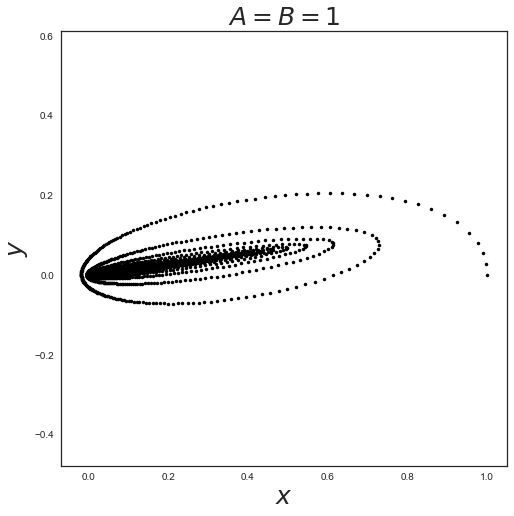

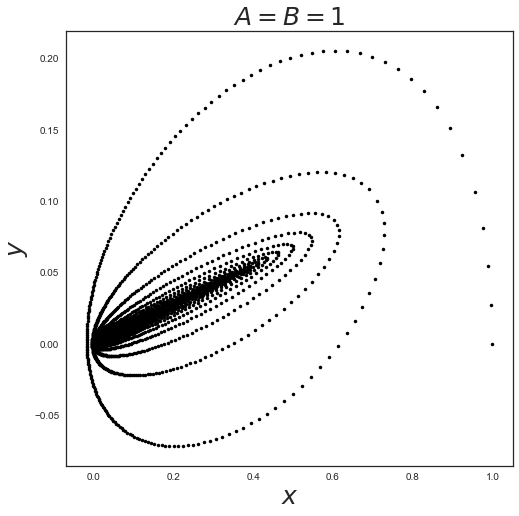

In [56]:
plt.figure(figsize=(8,8))

plt.axis('equal')
plt.plot(xs,ys,'k.')
plt.plot([0],[0],'k.')
plt.title("$A=B=1$",fontsize=25)
plt.xlabel('$x$',fontsize = 25)
plt.ylabel('$y$',fontsize = 25)

plt.figure(figsize=(8,8))
plt.plot(xs,ys,'k.')
plt.title("$A=B=1$",fontsize=25)

plt.xlabel('$x$',fontsize = 25)
plt.ylabel('$y$',fontsize = 25)

plt.plot([0],[0],'k.')


Text(0, 0.5, '$log(r)$')

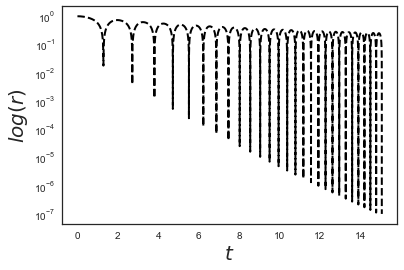

In [57]:
plt.figure()
plt.plot(ts,rs,'k--',linewidth=2)
plt.yscale('log')
plt.xlabel("$t$",fontsize=20)
plt.ylabel('$log(r)$',fontsize=20)